In [621]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [622]:
path_2020 = "../data/raw/2020_season/nba2021_per_game.csv"
path_2021 = "../data/raw/2021_season/2021-2022 NBA Player Stats - Regular.csv"
path_2022 = "../data/raw/2022_season/2022-2023 NBA Player Stats - Regular.csv"
stand_2020 = "../data/raw/standings_2020"

In [623]:
df_2022 = pd.read_csv(path_2022, encoding="latin-1", sep=";")
df_2021 = pd.read_csv(path_2021, sep=";", encoding="latin-1")
df_2020 = pd.read_csv(path_2020)

# Visualización de los Dataframes


## Temporada 2020-2021

In [624]:
df_2020

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,PF,21,MIA,28,2,14.6,2.6,4.4,0.590,...,0.561,1.3,2.7,4.0,0.6,0.4,0.5,1.0,1.9,6.5
1,Jaylen Adams,PG,24,MIL,6,0,2.8,0.2,1.3,0.125,...,0.000,0.0,0.5,0.5,0.3,0.0,0.0,0.0,0.2,0.3
2,Steven Adams,C,27,NOP,27,27,28.1,3.5,5.8,0.603,...,0.468,4.3,4.6,8.9,2.1,1.0,0.6,1.7,1.9,8.0
3,Bam Adebayo,C,23,MIA,26,26,33.6,7.4,12.9,0.573,...,0.841,1.9,7.3,9.2,5.3,1.0,1.0,3.0,2.6,19.9
4,LaMarcus Aldridge,C,35,SAS,18,18,26.7,5.9,12.5,0.476,...,0.762,0.8,3.5,4.3,1.9,0.4,0.9,0.9,1.5,14.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
492,Delon Wright,SG,28,DET,28,23,29.4,3.7,8.1,0.456,...,0.785,1.1,3.5,4.6,4.9,1.4,0.5,1.2,1.1,10.5
493,Thaddeus Young,PF,32,CHI,23,0,25.7,5.1,8.7,0.587,...,0.500,2.4,3.4,5.8,4.4,1.4,0.5,2.0,2.9,11.2
494,Trae Young,PG,22,ATL,26,26,34.7,7.6,17.7,0.429,...,0.887,0.7,3.2,3.8,9.3,0.8,0.3,4.3,2.0,26.5
495,Cody Zeller,C,28,CHO,15,12,24.1,4.2,8.0,0.525,...,0.759,2.6,5.4,8.0,2.5,0.7,0.6,0.9,2.5,10.1


## Temporada 2021 - 2022


In [625]:
df_2021.head()

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,22,TOR,73,28,23.6,3.6,8.3,...,0.595,2.0,4.5,6.5,1.1,0.5,0.6,1.2,2.1,9.1
1,2,Steven Adams,C,28,MEM,76,75,26.3,2.8,5.1,...,0.543,4.6,5.4,10.0,3.4,0.9,0.8,1.5,2.0,6.9
2,3,Bam Adebayo,C,24,MIA,56,56,32.6,7.3,13.0,...,0.753,2.4,7.6,10.1,3.4,1.4,0.8,2.6,3.1,19.1
3,4,Santi Aldama,PF,21,MEM,32,0,11.3,1.7,4.1,...,0.625,1.0,1.7,2.7,0.7,0.2,0.3,0.5,1.1,4.1
4,5,LaMarcus Aldridge,C,36,BRK,47,12,22.3,5.4,9.7,...,0.873,1.6,3.9,5.5,0.9,0.3,1.0,0.9,1.7,12.9


## Temporada 2022 - 2023

In [626]:
df_2022

,Rk,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,1,Precious Achiuwa,C,23,TOR,55,12,20.7,3.6,7.3,...,0.702,1.8,4.1,6.0,0.9,0.6,0.5,1.1,1.9,9.2
1,2,Steven Adams,C,29,MEM,42,42,27.0,3.7,6.3,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,3,Bam Adebayo,C,25,MIA,75,75,34.6,8.0,14.9,...,0.806,2.5,6.7,9.2,3.2,1.2,0.8,2.5,2.8,20.4
3,4,Ochai Agbaji,SG,22,UTA,59,22,20.5,2.8,6.5,...,0.812,0.7,1.3,2.1,1.1,0.3,0.3,0.7,1.7,7.9
4,5,Santi Aldama,PF,22,MEM,77,20,21.8,3.2,6.8,...,0.750,1.1,3.7,4.8,1.3,0.6,0.6,0.8,1.9,9.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
674,535,Thaddeus Young,PF,34,TOR,54,9,14.7,2.0,3.7,...,0.692,1.3,1.8,3.1,1.4,1.0,0.1,0.8,1.6,4.4
675,536,Trae Young,PG,24,ATL,73,73,34.8,8.2,19.0,...,0.886,0.8,2.2,3.0,10.2,1.1,0.1,4.1,1.4,26.2
676,537,Omer Yurtseven,C,24,MIA,9,0,9.2,1.8,3.0,...,0.833,0.9,1.7,2.6,0.2,0.2,0.2,0.4,1.8,4.4
677,538,Cody Zeller,C,30,MIA,15,2,14.5,2.5,3.9,...,0.686,1.7,2.6,4.3,0.7,0.2,0.3,0.9,2.2,6.5


# Limpieza de datos

## Equipos clasificados a playoffs

In [627]:
equipos_este_2020 = ["PHI", "BKN", "MIL", "NYK", "ATL", "MIA", "BOS", "WAS"]
equipos_este_2021 = ["MIA", "BOS", "MIL", "PHI", "TOR", "CHI", "BKN", "CLE"]
equipos_este_2022 = ["MIL", "BOS", "PHI", "CLE", "NYK", "BKN", "MIA", "ATL"]
equipos_oeste_2020 = ["UTA", "PHX", "DEN", "LAC", "DAL", "POR", "LAL", "MEM"]
equipos_oeste_2021 = ["PHX", "MEM", "GSW", "DAL", "UTA", "DEN", "MIN", "LAC"]
equipos_oeste_2022 = ["DEN", "MEM", "SAC", "PHX", "LAC", "GSW", "LAL", "MIN"]
playoffs_2020 = equipos_este_2020 + equipos_oeste_2020
playoffs_2021 = equipos_este_2021 + equipos_oeste_2021
playoffs_2022 = equipos_oeste_2022 + equipos_este_2022


## Repetición de jugadores

In [628]:
# Dentro de los datasets, podemos ver que hay ciertos jugadores que se repiten en varias ocaciones, esto es debido a que
# durante la temporada cambiaron de equipo, para proseguir tenemos que quitar a los jugadores duplicados y solo dejar 
# la fila que contiene sus promedios generales. Además ya que la fila de los promedios generales, en la sección de equipo
# solo dice "TOT" tendremos que cambiar el "TOT" por el último equipo en el que jugó el jugador

In [629]:
def eliminador(df): #Iniciamos una función que va a eliminar los valores duplicados
    idx = []
    ultimo_equipo = {}
    contador = 0
    for id, player in enumerate(df["Player"]): #vamos iterando a traves de los jugadores y de su índice
        if player == df["Player"].iloc[id - 1]: #si el jugador es igual al pasado guardamos su índice en la lista idx
            contador +=1
            if contador == 2:
                ultimo_equipo[player] =  df["Tm"].iloc[id] #La segunda vez que se repite un jugador guardamos el jugador y su equipo en ultimo_equipo
                contador = 0
            idx.append(id)
        else:
            contador = 0
    df.drop(idx, inplace=True) #Tiramos las filas repetidas

    for jugador, equipo in ultimo_equipo.items():
        idx_tot = df[(df["Player"] == jugador) & (df["Tm"] == "TOT")].index #sacamos el índice de la fila de promedios del jugador repetido
        df.loc[idx_tot, "Tm"] = equipo  #Sustituímos el valor "TOT" por el último equipo en dónde estuvo el jugador
    return df

## Jugadores ausentes

In [630]:
# Ya que existe la posibilidad de que existan jugadores que su último temporada fue en 2021 o que su primera temporada fue en
# 2022, voy a tomar la decisión de eliminar a esos jugadores y solo quedarme con loq ue estuvieron activos ambos años.

In [631]:
def ausente(df1, df2, df3):
    jugadores_df2 = set(df2["Player"])
    jugadores_df3 = set(df3["Player"]) #Hacemos una lista de todos los jugadores en la columna "Player"
    df1_filtrado = df1[(df1["Player"].isin(jugadores_df2)) & (df1["Player"].isin(jugadores_df3))] #Hacemos un filtrado de los jugadores que aparecen en los tres dataframes
    return df1_filtrado

## Ajuste de índice

In [632]:
# El valor que tienen en común ambos datsets son los nombres de los jugadores, entonces para poder concatenar los df de manera
# exitosa, haremos que la columna "Players" se convierta en el índice. Además tiraremos la columna "Rk", ya que ya no sirve
# ninguna función.

In [633]:
def continuo(df):
    df = df.set_index(['Player']) #Cambiamos "Player" a ser el nuevo índice
    if "Rk" in df.columns:
        df = df.drop(["Rk"], axis=1) # Tiramos la columna "Rk"
    return df

## Cambio de nombre columnas

In [634]:
# Ahora cada columna del dataframe le cambiaremos el nombre, esto con el fin de poder identificar las estadísticas del 2021 y las
# del 2022 al momento de concatenar los dataframes.

In [635]:
def nombre_col(df, nuevo_nombre):
    columnas = [col for col in df.columns] # Sacamos una lista de todas las columnas
    columnas_nuevas = {col: col + "_" + nuevo_nombre for col in columnas} #Hacemos un diccionario con el nombre de la columna y su nuevo nombre
    df = df.rename(columns = columnas_nuevas) # Apliamos los cambios en las columnas
    return df

## Tratamiento de variables categoricas

In [636]:
def numericas(df, playoff):
    df["Tm"] = df["Tm"].apply(lambda x: 1 if x in playoff else  # Asignamos valor dependiendo si el equipo del jugador estuvo en playoffs
                              0)
    df["Age"] = df["Age"].apply(lambda x: 1 if x < 30 else # Asignamos valor dependiendo de si el jugador era mayor o menor a 30 años
                                0)
    df["Pos"] = df["Pos"].apply(lambda x: 0 if x == "PG" else # Asignamos valor dependiendo de la posición que juega el jugador
                                1 if x == "SG" else 
                                2 if x == "SF" else 
                                3 if x == "PF" else 
                                4)
    df["GS"] = df.apply(lambda row: 
                     0 if row["GS"] < row["G"] * 0.2 else  # Asignamos valor dependiendo del porcentaje de juegos que el jugador inició
                     1 if row["GS"] < row["G"] * 0.4 else 
                     2 if row["GS"] < row["G"] * 0.6 else 
                     3 if row["GS"] < row["G"] * 0.8 else 
                     4 if row["GS"] == row["G"] else 
                     5, axis=1)

    if df.equals(df_2020):
        max_2020 = df["G"].max()
        df["G"] = df["G"].apply(lambda x: 0 if x < max_2020*0.2 else  # Ya que el dataset de 2020 no está completo en todos para todos los juegos de la temporada 
                                1 if x < max_2020*0.4 else  # hacemos un calculo diferente para el df_2022 
                                2 if x < max_2020*0.6 else  # asignamos valor dependiendo de el número de juegos que el jugador jugó
                                3 if x < max_2020*0.8 else 
                                4)

    else:
        df["G"] = df["G"].apply(lambda x:0 if x < 82*0.2 else   
                                1 if x < 82*0.4 else 
                                2 if x < 82*0.6 else 
                                3 if x < 82*0.8 else 
                                4)
    
    return df

## Aplicación de los cambios

In [637]:
df_2020 = numericas(df_2020, playoffs_2020)
df_2021 = numericas(df_2021, playoffs_2021)
df_2022 = numericas(df_2022, playoffs_2022)

In [638]:
df_2020 = ausente(eliminador(df_2020), df_2021, df_2022)
df_2021 = ausente(eliminador(df_2021), df_2020, df_2022)
df_2022 = ausente(eliminador(df_2022), df_2020, df_2021)


In [639]:
df_2021 = nombre_col(continuo(df_2021), "2021")
df_2022 = nombre_col(continuo(df_2022), "2022")
df_2020 = nombre_col(continuo(df_2020), "2020")

## Concatenación y normalización

In [640]:
df_comb = df_2020.join(df_2021).join(df_2022) #Usamos el operador .join() para que junte ambos Df usando como referencia el índice
x_mean = df_comb.mean()
x_std = df_comb.std()
df_comb = (df_comb - x_mean)/ x_std

In [641]:
df_comb.head()

,Pos_2020,Age_2020,Tm_2020,G_2020,GS_2020,MP_2020,FG_2020,FGA_2020,FG%_2020,3P_2020,...,FT%_2022,ORB_2022,DRB_2022,TRB_2022,AST_2022,STL_2022,BLK_2022,TOV_2022,PF_2022,PTS_2022
Player,,,,,,,,,,,,,,,,,,,,,
Precious Achiuwa,0.748185,0.461868,1.064585,0.853840,-1.008815,-0.869503,-0.505209,-0.764552,1.359068,-1.219287,...,-0.300014,1.105233,0.588186,0.852125,-0.767952,-0.270522,0.194347,-0.188979,0.051286,-0.220012
Steven Adams,1.462050,0.461868,-0.936322,0.853840,1.114290,0.609456,-0.137403,-0.487272,1.491966,-1.219287,...,-2.425526,5.372005,1.974942,3.222824,-0.088508,0.513405,1.804157,0.779588,0.627913,-0.303605
Bam Adebayo,1.462050,0.461868,1.064585,0.853840,1.114290,1.211995,1.456423,0.918936,1.185277,-1.118139,...,0.353990,2.010306,2.090505,2.231441,0.348277,1.297333,0.999252,1.506013,1.348696,1.340390
Nickeil Alexander-Walker,-0.679544,0.461868,-0.936322,-0.028273,-1.008815,-0.365561,-0.219138,-0.011934,-0.481070,-0.207807,...,-0.520111,-0.834209,-0.914133,-1.001330,-0.331166,-0.531831,-0.073955,-0.431121,-0.525340,-0.637977
Grayson Allen,-0.679544,0.461868,1.064585,-0.028273,0.052737,0.149336,-0.260005,-0.170380,-0.286833,1.107116,...,0.976551,-0.187728,-0.394100,-0.311672,-0.088508,0.513405,-0.610558,-0.310050,-0.381183,-0.052826


# Aplicación de algoritmo de KMEANS

## Método del codo para elegir un valor de KMEANS

c:\Users\Roi_f\anaconda3\envs\PBD\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Roi_f\anaconda3\envs\PBD\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Roi_f\anaconda3\envs\PBD\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\Roi_f\anaconda3\envs\PBD\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is k

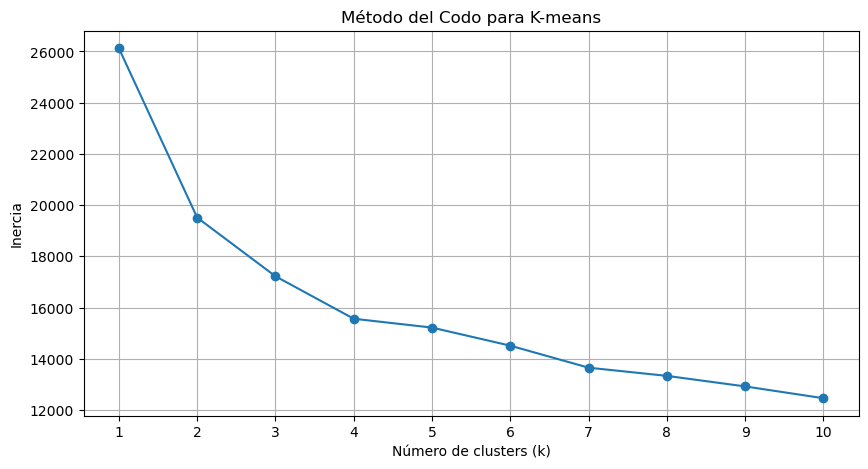

In [642]:
X = df_comb.values
distortions = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters= i, random_state= 32)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

plt.figure(figsize=(10,5))
plt.plot(range(1,11), distortions, marker= "o")
plt.xlabel('Número de clusters (k)')
plt.ylabel('Inercia')
plt.title('Método del Codo para K-means')
plt.xticks(np.arange(1, 11, 1))
plt.grid()
plt.show()

In [643]:
# Aunque es un pcoo difici de establecer cual es el codo para esta base de datos, nos podemos dar una idea que el mejor valor
# de k para KMEANS va a ser de 4.

## Agrupación de los jugadores por clusters 

In [644]:
X = df_comb
kmeans = KMeans(n_clusters= 3, random_state= 32)
clusters = kmeans.fit_predict(X)
df_comb["Cluster"] = clusters
cluster_stats = df_comb.groupby("Cluster").mean()
cluster_stats

c:\Users\Roi_f\anaconda3\envs\PBD\lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,Pos_2020,Age_2020,Tm_2020,G_2020,GS_2020,MP_2020,FG_2020,FGA_2020,FG%_2020,3P_2020,...,FT%_2022,ORB_2022,DRB_2022,TRB_2022,AST_2022,STL_2022,BLK_2022,TOV_2022,PF_2022,PTS_2022
Cluster,,,,,,,,,,,,,,,,,,,,,
0,1.202463,0.104588,-0.117769,0.105381,-0.011599,-0.205714,-0.203658,-0.414651,0.957738,-0.802435,...,-0.581186,1.058216,0.427098,0.671221,-0.542206,-0.417013,0.828515,-0.267859,0.328679,-0.374954
1,-0.283909,-0.043202,0.076185,-0.208947,-0.414090,-0.401265,-0.521458,-0.446467,-0.432911,-0.090817,...,0.019525,-0.458004,-0.513840,-0.534461,-0.308655,-0.224872,-0.387512,-0.501867,-0.454998,-0.506209
2,-0.402922,0.003359,-0.060925,0.346625,0.868806,1.002339,1.250043,1.268507,0.108157,0.850453,...,0.438963,0.077329,0.713861,0.555249,1.087778,0.810644,0.120564,1.262358,0.672962,1.359721


## Visualización

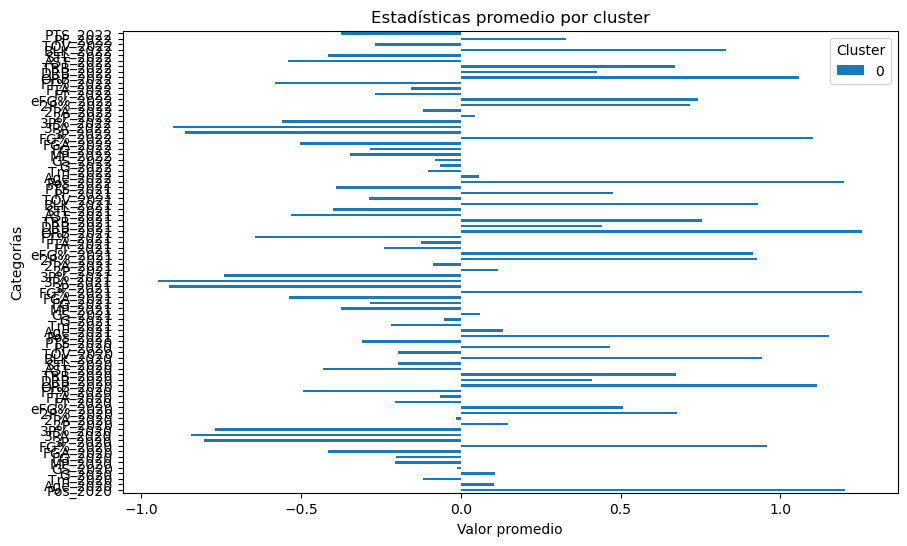

In [645]:
cluster_stats.loc[0].plot(kind='barh', figsize=(10, 6))
plt.xlabel('Valor promedio')
plt.ylabel('Categorías')
plt.title('Estadísticas promedio por cluster')
plt.legend(title='Cluster')
plt.show()

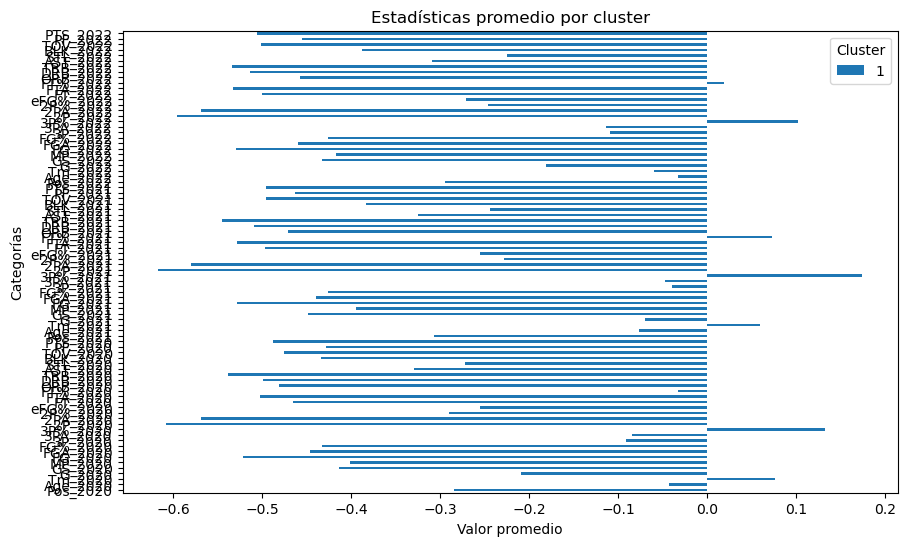

In [646]:
cluster_stats.loc[1].plot(kind='barh', figsize=(10, 6))
plt.xlabel('Valor promedio')
plt.ylabel('Categorías')
plt.title('Estadísticas promedio por cluster')
plt.legend(title='Cluster')
plt.show()

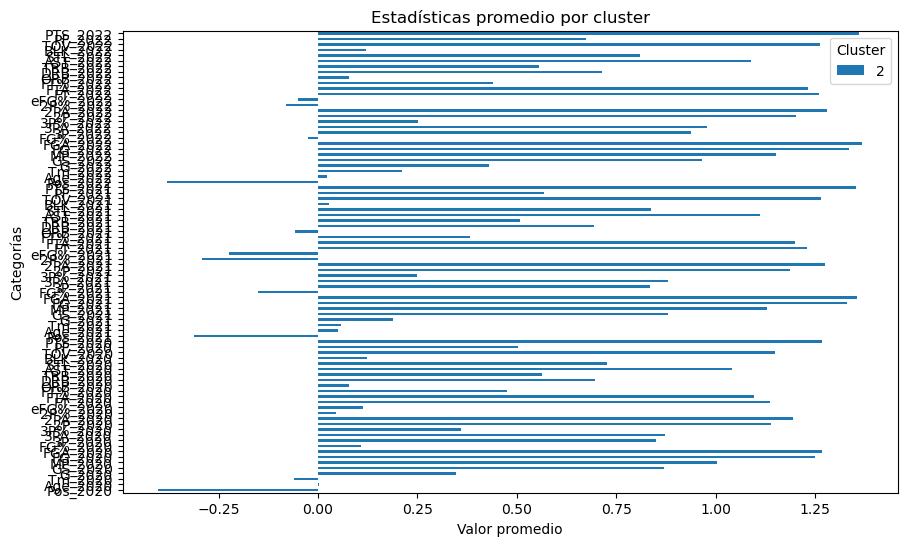

In [647]:
cluster_stats.loc[2].plot(kind='barh', figsize=(10, 6))
plt.xlabel('Valor promedio')
plt.ylabel('Categorías')
plt.title('Estadísticas promedio por cluster')
plt.legend(title='Cluster')
plt.show()

In [648]:
cluster_stats.loc[3].plot(kind='barh', figsize=(10, 6))
plt.xlabel('Valor promedio')
plt.ylabel('Categorías')
plt.title('Estadísticas promedio por cluster')
plt.legend(title='Cluster')
plt.show()

KeyError: 3

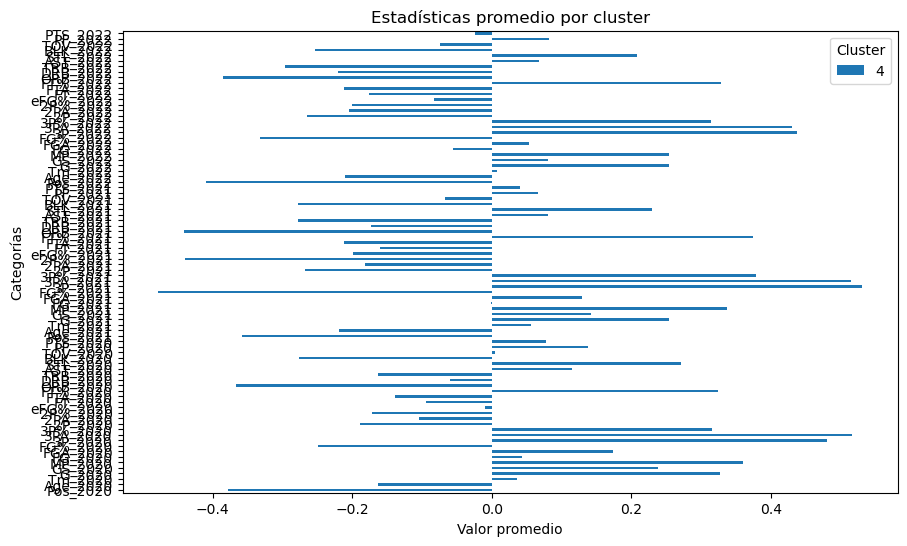

In [ ]:
cluster_stats.loc[4].plot(kind='barh', figsize=(10, 6))
plt.xlabel('Valor promedio')
plt.ylabel('Categorías')
plt.title('Estadísticas promedio por cluster')
plt.legend(title='Cluster')
plt.show()

In [ ]:
jugadores_0 = df_comb[df_comb["Cluster"] == 0]["Cluster"].index.tolist()
jugadores_1 = df_comb[df_comb["Cluster"] == 1]["Cluster"].index.tolist()
jugadores_2 = df_comb[df_comb["Cluster"] == 2]["Cluster"].index.tolist()
jugadores_3 = df_comb[df_comb["Cluster"] == 3]["Cluster"].index.tolist()

print(jugadores_0)
print(jugadores_1)
print(jugadores_2)
print(jugadores_3)

['Udoka Azubuike', 'Moses Brown', 'Chris Silva', 'Dylan Windler']
['Precious Achiuwa', 'Steven Adams', 'Jarrett Allen', 'Deandre Ayton', 'Marvin Bagley III', 'Mo Bamba', 'Bismack Biyombo', 'Chris Boucher', 'Thomas Bryant', 'Clint Capela', 'Wendell Carter Jr.', 'Brandon Clarke', 'John Collins', 'Andre Drummond', 'Drew Eubanks', 'Daniel Gafford', 'Rudy Gobert', 'Aaron Gordon', 'Draymond Green', 'Montrezl Harrell', 'Josh Hart', 'Isaiah Hartenstein', 'Jaxson Hayes', 'Willy Hernangómez', 'Richaun Holmes', 'Serge Ibaka', 'DeAndre Jordan', 'Kevon Looney', 'Brook Lopez', 'JaVale McGee', 'Larry Nance Jr.', 'Nerlens Noel', 'Onyeka Okongwu', 'Mason Plumlee', 'Jakob Poeltl', 'Bobby Portis', 'Dwight Powell', 'Naz Reid', 'Mitchell Robinson', 'Isaiah Stewart', "Jae'Sean Tate", 'Daniel Theis', 'Myles Turner', 'Jarred Vanderbilt', 'Robert Williams', 'Thaddeus Young', 'Cody Zeller', 'Ivica Zubac']
['Bam Adebayo', 'Giannis Antetokounmpo', 'OG Anunoby', 'LaMelo Ball', 'RJ Barrett', 'Bradley Beal', 'Devin 